In [1]:
'''
【课程1.3】  对比分析

对比分析 → 两个互相联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

'''

'\n【课程1.3】  对比分析\n\n对比分析 → 两个互相联系的指标进行比较\n\n绝对数比较（相减） / 相对数比较（相除）\n结构分析、比例分析、空间比较分析、动态对比分析\n\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

                A_sale      B_sale
2017-06-01  342.108081  910.490544
2017-06-02   42.338021  837.794861
2017-06-03  796.717819  291.489609
2017-06-04  846.915779  140.934703
2017-06-05  590.014450  579.951743


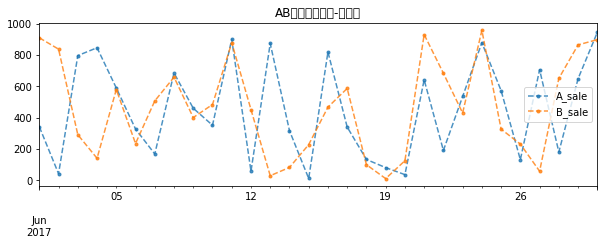

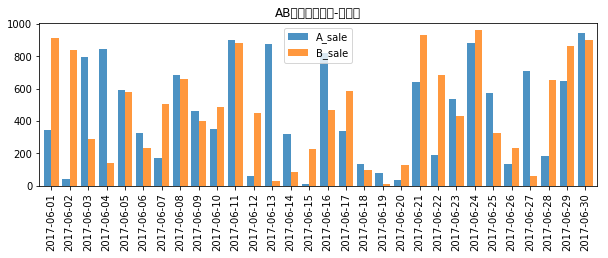

In [6]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20170601','20170630'))
print(data.head())
# 创建数据 → 30天内A/B产品的日销售额

data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
       figsize = (10,3),
       title = 'AB产品销量对比-折线图')
# 折线图比较

data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
          figsize = (10,3),
          title = 'AB产品销量对比-柱状图')
# 多系列柱状图比较

[Text(0, 0, '2017-06-01'),
 Text(0, 0, '2017-06-06'),
 Text(0, 0, '2017-06-11'),
 Text(0, 0, '2017-06-16'),
 Text(0, 0, '2017-06-21'),
 Text(0, 0, '2017-06-26')]

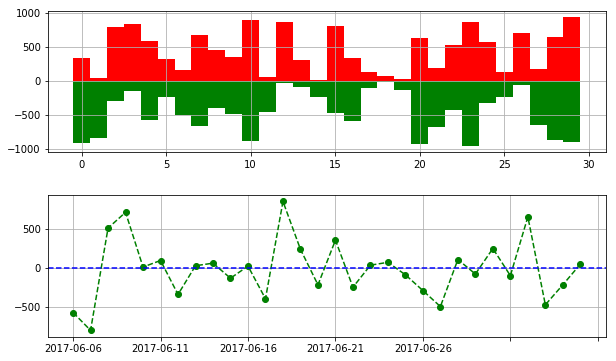

In [45]:
#绝对数比较 相减

x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']

fig3 = plt.figure(figsize = (10,6))
plt.subplots_adjust(hspace = 0.3)

ax1 = fig3.add_subplot(2,1,1)
plt.bar(x,y1,width = 1,facecolor = 'r')
plt.bar(x,y2,width = 1,facecolor = 'g')
plt.grid()

ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] -data ['B_sale']
plt.plot(x,y3,'--go')
plt.axhline(0,color = 'b',linestyle = '--')
plt.grid()
ax2.set_xticklabels(data.index[::5])

                A_sale      B_sale
2017-06-01  548.391319  161.763634
2017-06-02  104.865337  132.642435
2017-06-03  138.502673   24.846516
2017-06-04  947.497627  172.535812
2017-06-05  751.307773  141.890718
------


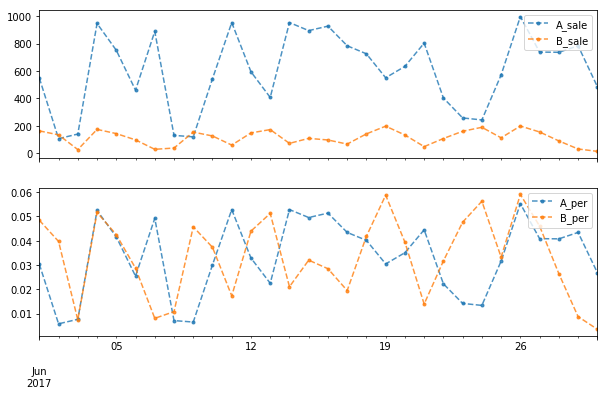

In [51]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B产品的日销售额
# A/B产品销售额量级不同

data['A_per'] = data['A_sale']/data['A_sale'].sum()
data['B_per'] = data['B_sale']/data['B_sale'].sum()
data['A_per%'] = data['A_per'].apply(lambda x : '%.3f%%' %(x*100))
data['B_per%'] = data['B_per'].apply(lambda x : '%.3f%%' %(x*100))
data

fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')
# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

         consumption       salary
2017-01  2203.724042  5096.547227
2017-02  2817.687670  5130.794501
2017-03  2521.574660  5177.098733
2017-04  2838.152940  5444.300041
2017-05  2972.571076  5076.106847
------


,consumption,salary,c_s,c_s%
2017-01,2203.724042,5096.547227,0.432395,43.240%
2017-02,2817.687670,5130.794501,0.549172,54.917%
2017-03,2521.574660,5177.098733,0.487063,48.706%
2017-04,2838.152940,5444.300041,0.521307,52.131%
2017-05,2972.571076,5076.106847,0.585601,58.560%
2017-06,2924.743143,5421.355180,0.539486,53.949%
2017-07,2224.353019,5221.068742,0.426034,42.603%
2017-08,2489.534760,5358.639589,0.464583,46.458%
2017-09,2789.106680,5002.770892,0.557512,55.751%
2017-10,2341.812375,5422.787875,0.431847,43.185%


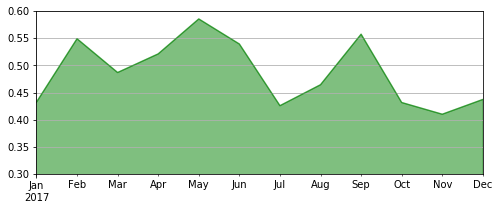

In [59]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
print('------')
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机

data['c_s'] = data['consumption'] / data['salary']
data['c_s%'] = data['c_s'].apply(lambda x :'%.3f%%' %(x*100))


data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)
data

                      A            B            C           D
2017-06-01  2129.036194   734.461745  4858.333480  261.519795
2017-06-02  2495.980356  1689.542545  6414.887791  280.111538
2017-06-03   513.782678   916.177104  6916.766725    8.956003
2017-06-04  1457.960170  1114.014429  2844.506041   99.186419
2017-06-05  3902.397781   717.157872  4692.847122  291.450399
------


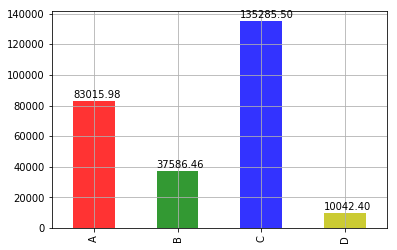

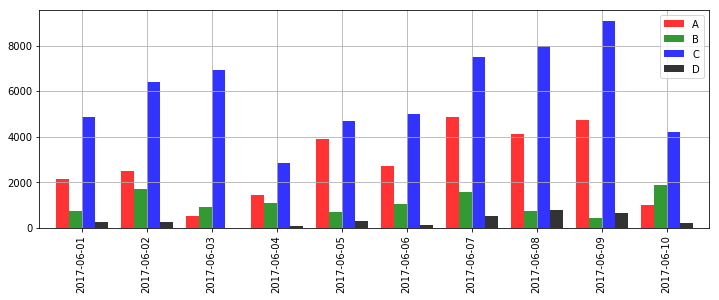

In [74]:
# 2、相对数比较 → 相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事
data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B/C/D四个产品的销售情况
# 不同产品的销售量级不同

data.sum().plot(kind = 'bar',color = ['r','g','b','y'],alpha = 0.8,grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')
# 通过柱状图做横向比较 → 4个产品的销售额总量

data[:10].plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True, figsize = (12,4),width = 0.8)
# 多系列柱状图，横向比较前十天4个产品的销售额

# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比

                      A
2017-06-01  1354.255878
2017-06-02  2761.671800
2017-06-03  1599.237802
2017-06-04  2525.705793
2017-06-05  2718.271488
------
                      A  base     l_growth     z_growth    lspeed    zspeed
2017-06-01  1354.255878  1000   354.255878     0.000000  0.354256       NaN
2017-06-02  2761.671800  1000  1761.671800  1407.415922  1.761672  1.039254
2017-06-03  1599.237802  1000   599.237802 -1162.433998  0.599238 -0.420917
2017-06-04  2525.705793  1000  1525.705793   926.467991  1.525706  0.579318
2017-06-05  2718.271488  1000  1718.271488   192.565695  1.718271  0.076242
------


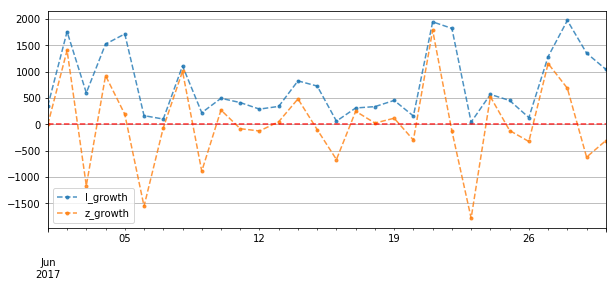

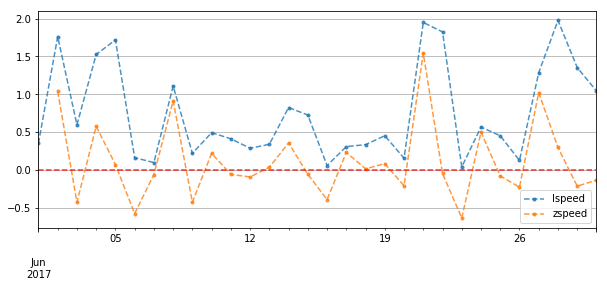

In [93]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A产品的销售情况

data['base'] = 1000
#累计的增长量 
data['l_growth'] = data['A'] - data['base']  # 累计增长量 = 报告期水平 - 固定基期水平
#逐期增长量
#data['B'] = data.shift(1)['A']   #将A的值往下移动一个单位
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平
data.fillna(0,inplace = True)
data

data[['l_growth','z_growth']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.axhline(0,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.legend(loc = 'lower left')
plt.grid()
# 通过折线图查看增长量情况

#定基增长速度
data['lspeed'] =data['l_growth']/1000
#环比增长速度
data['zspeed'] = data['z_growth']/data.shift(1)['A']
data[['lspeed','zspeed']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.axhline(0,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.grid()
print(data.head())
print('------')
# 通过折线图查看发展速度